# Part 4: Recommendations

This notebook is dedicated to building personalized and suitable recommendations based on the created user profiles. First, general recommendations will be made, then personalized recommendations will be made that can then be compared to the general recommendations to point out the advantages of more personal and focused recommendations. Then, location based recommendations will be made. Finally, recommendations for business based on their customers profiles will be created.

**Table of contents**

1. [General recommendations](#general)\
    1.1 [Top and worst places in NY](#topandworst)\
    1.2 [Top and worst restaurants in NY](#topandworstrest)\
    1.3 [Top cheapest and worst expensive restaurants in NY](#topandworstrestprice)


2. [Personal recommendations based on the user profile](#personal)\
    2.1 [Preparation and function creation](#prepfunc)\
    2.2 [Results and comparison to general recommendations](#comptogen)\
    2.3 [Limitations of personalized recommendations](#limitpers)

3. [Location based recommendations](#locations)

4. [Recommendations for businesses based on the user profile](#business)

5. [Conclusion](#conclusion)

**General code**

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='general'></a>
## 1 General recommendations
The first part is dedicated to making and improving general recommendations for NY state. It will be focused on the NY state to reduce the data and to focus the analysis to an understandable area. 

**Preprocessing**

In [ ]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/Clean_dataset_google_local_data_with_3+_reviews.csv',error_bad_lines=False, engine="python")

In [ ]:
# filter to NY Sate
df_ny = df[df.state == ' NY']

In [ ]:
df_ny.head(5)

,placeID,name,lat,long,address,price_clean,country,state,username,userID,...,date,time,lang,currentPlace,education,jobs,previousPlaces,category,category1,count
1160,104575389945153765911,Mayahuel,40.727131,-73.988174,"304 E 6th StNew York, NY 10003",1.0,US,NY,Jon Wiley,111902435909328987615,...,"Sep 14, 2012",1.347681e+09,en,"['Mountain View, CA', [[], 373860520, -1220838...","[[[], [], [], [], [], 6], [['University of Tex...","[['Google', 'Designer', [[1, 1, 2006], [1, 1, ...","[['Austin, TX', [[], 302671530, -977430610, 1]]]","['Mexican Restaurant', 'Bar']",Mexican Restaurant,20
1176,109941031043710720464,"The Standard, High Line",40.740884,-74.007821,"848 Washington StNew York, NY 10014",NaN,US,NY,Jon Wiley,111902435909328987615,...,"Feb 21, 2014",1.392990e+09,en,"['Mountain View, CA', [[], 373860520, -1220838...","[[[], [], [], [], [], 6], [['University of Tex...","[['Google', 'Designer', [[1, 1, 2006], [1, 1, ...","[['Austin, TX', [[], 302671530, -977430610, 1]]]",['Hotel'],Hotel,20
1262,102087783737212492753,Tony & Tina Machine,40.773793,-73.082196,"929 Lincoln AveHolbrook, NY 11741",NaN,US,NY,MRO Electric and Supply Company,101802055307239223251,...,"Mar 24, 2014",1.395681e+09,en,[],"[[], []]",[],[],['Auto Repair Shop'],Auto Repair Shop,14
1277,117898409493991598085,Rite Aid,40.689906,-73.992405,"120 Court StBrooklyn, NY 11201",2.0,US,NY,Jesse Spry,110434521587299439249,...,"Sep 14, 2011",1.316029e+09,en,[],"[[[], [], [], [], [], 6], []]",[],[],"['Cosmetics Store', 'Pharmacy', 'Department St...",Cosmetics Store,7
1278,118026888258705355775,Nirvana,40.749995,-73.977346,"346 Lexington AveNew York, NY 10016",2.0,US,NY,Jesse Spry,110434521587299439249,...,"Nov 17, 2010",1.290005e+09,en,[],"[[[], [], [], [], [], 6], []]",[],[],"['Indian Restaurant', 'Asian Restaurant', 'Sou...",Indian Restaurant,7


**Recommendations by mean rating**

The first recommendation that will be created is the top places in NY state by mean rating. 

In [ ]:
# get the mean ratings for all the places and sort descending by rating
top_general_places = df_ny.groupby('placeID').agg({'name':'first', 'category1':'first',
                                       'rating':'mean'}).reset_index().rename(columns={'rating':'mean_rating'}
                                                                ).sort_values(by='mean_rating', ascending=False)

From the top 10 general recommendations based on the mean rating below, it become evident that there are a lot of recommendations with a mean rating of 5. That means the mean rating alone is not the best indicator even for making general recommendations.

In [ ]:
top_general_places.head(10)

,placeID,name,category1,mean_rating
19084,108070047039835699651,Institute For Contemporary Psychotherapy,Psychologist,5.0
24800,110544429060270299769,Ravenswood Comics-Cards & Game,Comic Book Store,5.0
11127,104719792380757143758,Recess Coffee House,Coffee Shop,5.0
24815,110549743055133862737,Montauk Credit Union,Credit Union,5.0
11130,104720596790996230341,L2 Computer Inc.,Computer Repair Service,5.0
24811,110548038160380677772,Intermediate School 383,Public School,5.0
24809,110547011332489947905,Clarke's Standard,American Restaurant,5.0
11133,104721464629719973630,Bridal Styles Boutique,Bridal Shop,5.0
11135,104722031346073191104,Memories Pub Inc,Bar & Grill,5.0
11136,104722948095332725522,Bayport Aerodrome,Airport,5.0


Generally, a mean rating of a place is worth more if more users have rated the place so that should be taken into account when finding the top general places.

In [ ]:
# aggregate the mean rating and number of ratings by place
top_general_places = df_ny.groupby('placeID').agg({'name':'first', 'category1':'first', 'userID':'count',
                                       'rating':'mean', 'lat':'first', 'long':'first'}).reset_index().rename(columns={'rating':'mean_rating', 
                                       'userID':'users_count'}
                                       ).sort_values(by=['mean_rating', 'users_count'], ascending=False)

In [ ]:
top_general_places.head(10)

,placeID,name,category1,users_count,mean_rating,lat,long
19796,108374896846713341273,Divine Moving & Storage,Corporate Campus,20,5.0,40.756619,-73.969968
392,100165622943128541425,Chris Ross Agency - State Farm Insurance,Insurance Agency,17,5.0,43.204763,-77.477814
8344,103551577901864351390,Terrance J. O'Keefe DDS LLC,Cosmetic Dentist,15,5.0,43.130097,-77.451525
20162,108529670926992049433,Joe Bean Coffee Roasters,Coffee Shop,13,5.0,43.150440,-77.566554
1116,100491970076555637706,Queens Electrician,Electrician,12,5.0,40.726057,-73.747768
2392,101025008660458420761,Kids N Action,Party Equipment Rental Service,12,5.0,40.625408,-73.975951
40278,117146455291445111046,Move-it 4 Less,Mover,12,5.0,40.814669,-73.960433
13160,105575761384365762233,Rush Passport. Inc,Passport Office,11,5.0,40.748171,-73.989477
20110,108511164844756668043,Shleppers Moving & Storage,Mover,11,5.0,40.818738,-73.927164
26637,111324582399645224017,Schrader's Garage,Auto Repair Shop,11,5.0,43.144112,-77.599946


Also the IMDb's weighted rating can be calculated with the main formula from [here](https://www.kaggle.com/code/rounakbanik/movie-recommender-systems/notebook) that is as follows.

$$ WR = (\frac{v}{v+m} * R) + (\frac{m}{v+m} * C)$$

In the Formula WR is the Weigthed rating, v is the number of ratings for a place, m is the minimum possible vote, R is the average rating of the place and V is the mean vote across the whole data. 

In [ ]:
# implement the weighted rating formula
top_general_places['weighted_rating'] = (top_general_places['users_count']/(top_general_places['users_count']+1) *\
                top_general_places['mean_rating']) +  (1/(top_general_places['users_count']+1) * df_ny.rating.mean())

As can be seen below the weigthed rating leads to the same reesult as sorting the top places by mean rating and number of user that have rated the place.

In [ ]:
top_general_places.sort_values(by='weighted_rating', ascending=False).head(10)

,placeID,name,category1,users_count,mean_rating,lat,long,weighted_rating
19796,108374896846713341273,Divine Moving & Storage,Corporate Campus,20,5.0,40.756619,-73.969968,4.952239
392,100165622943128541425,Chris Ross Agency - State Farm Insurance,Insurance Agency,17,5.0,43.204763,-77.477814,4.944278
8344,103551577901864351390,Terrance J. O'Keefe DDS LLC,Cosmetic Dentist,15,5.0,43.130097,-77.451525,4.937313
20162,108529670926992049433,Joe Bean Coffee Roasters,Coffee Shop,13,5.0,43.150440,-77.566554,4.928358
1116,100491970076555637706,Queens Electrician,Electrician,12,5.0,40.726057,-73.747768,4.922847
2392,101025008660458420761,Kids N Action,Party Equipment Rental Service,12,5.0,40.625408,-73.975951,4.922847
40278,117146455291445111046,Move-it 4 Less,Mover,12,5.0,40.814669,-73.960433,4.922847
13160,105575761384365762233,Rush Passport. Inc,Passport Office,11,5.0,40.748171,-73.989477,4.916418
20110,108511164844756668043,Shleppers Moving & Storage,Mover,11,5.0,40.818738,-73.927164,4.916418
26637,111324582399645224017,Schrader's Garage,Auto Repair Shop,11,5.0,43.144112,-77.599946,4.916418


In [ ]:
# sort the top places ascending to get the worst places
worst_places = top_general_places.sort_values(by='weighted_rating', ascending=True)
worst_places.head(10)

,placeID,name,category1,users_count,mean_rating,lat,long,weighted_rating
2741,101184217616159615197,Mc Donald's,Restaurant,8,1.0,42.077360,-78.459433,1.333001
27520,111691095340241126760,Domino's Pizza,Delivery Restaurant,4,1.0,40.652334,-74.005954,1.599402
28394,112060493982619126979,Denny's,Restaurant,4,1.0,43.089037,-79.062386,1.599402
25851,110983906912167377945,McDonald's,Fast Food Restaurant,3,1.0,40.648746,-73.958159,1.749253
23002,109762464906026928758,TGI Fridays,American Restaurant,3,1.0,40.760329,-73.969408,1.749253
20606,108710740388669718201,Walmart Supercenter,Department Store,3,1.0,41.497839,-74.074339,1.749253
14631,106221092483518608030,Dollar Rent a Car,Car Rental Agency,3,1.0,40.763425,-73.984692,1.749253
5248,102224489381770065743,Best Buy - Albany,Computer Store,3,1.0,42.690285,-73.848686,1.749253
2868,101232171167229669657,Lasership Inc,Courier Service,3,1.0,40.748622,-73.994468,1.749253
28443,112082718054233589828,Peggy's Bridal,Bridal Shop,3,1.0,43.108870,-77.545215,1.749253


<a id='topandworst'></a>
### 1.1 Top and worst places in NY

Did you think the best place in NY was a fancy restaurant or a nice rooftop bar with view over the city? According the the reviews of places in NY movers and insurance agencies are very popular.

1. Divine Moving & Storage - Corporate Campus	
2. Chris Ross Agency - State Farm Insurance - Insurance Agency	
3. Terrance J. O'Keefe DDS LLC - Cosmetic Dentist	
4. Joe Bean Coffee Roasters - Coffee Shop
5. Queens Electrician - Electrician

At least the forth best place in the state is the Joe Bean Coffee Roasters Coffee shop, so if you like coffee, you should definitely get some coffee there.

The worst places contain a lot of fast food chains such as Domino's Pizza or McDonald's.

Below you can see where you can find these best and worst places. What is interesting to see is that the top places are concentrated in NYC and Rochester while the worst places are more spread over the whole state.

In [ ]:
ny_map = folium.Map(location=[42.443962, -76.501884], zoom_start=7, tiles='CartoDB positron')
top_10 = top_general_places.head(10)
flop_10 = worst_places.head(10)

for index,row in top_10.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#0000FF', fill=True, radius=3).add_to(ny_map)
    
for index,row in flop_10.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#FF0000', fill=True, radius=3).add_to(ny_map)
#folium.TileLayer('stamentoner').add_to(sf_map)
ny_map

However, these places are for very specific needs and we are going to make recommendations for specific categories for more general recommendations for restaurants in NY.

**Define function**

Define a function to make recommendations based on different categories with a specific sorting.

In [ ]:
def avg_recom(df, filtering, sorting, no):
    df = df[df.category.str.contains(filtering)]
    places = df.groupby('placeID').agg({'name':'first', 'category1':'first', 'userID':'count','rating':'mean', 
                                  'lat':'first', 'long':'first'}).reset_index().rename(columns={'rating':'mean_rating', 
                                  'userID':'users_count'})
    places['weighted_rating'] = (places['users_count']/(places['users_count']+1) * places['mean_rating']) + \
                             (1/(places['users_count']+1) * df_ny.rating.mean())
    return places.sort_values(by='weighted_rating', ascending=sorting).head(no)

In [ ]:
top_10_rest = avg_recom(df_ny, 'Restaurant', False, 10)
top_10_rest

,placeID,name,category1,users_count,mean_rating,lat,long,weighted_rating
7255,108781260344732185824,Rucola,Italian Restaurant,8,5.0,40.685607,-73.985878,4.888557
14482,117628273123261527621,Duane Park,American Restaurant,7,5.0,40.724945,-73.992654,4.874627
11360,113891103717933018846,La Maison du Croque Monsieur,French Restaurant,6,5.0,40.734999,-73.993005,4.856716
789,100958782908632389905,Park Place Sports Bar & Grill,American Restaurant,6,5.0,42.531934,-75.523246,4.856716
12105,114813623451138540062,Il Tinello Ristorante,Italian Restaurant,6,5.0,40.762680,-73.975790,4.856716
4525,105533439767374719265,Piora,New American Restaurant,6,5.0,40.730632,-74.006590,4.856716
7287,108826825210270566205,Chang's Garden of West Seneca Inc.,Chinese Restaurant,5,5.0,42.804949,-78.756495,4.832835
273,100344131770977118948,Brandani's Pizza,Pizza Restaurant,5,5.0,43.100758,-77.630017,4.832835
2486,103072304663940961145,Augie's Family Style Italian Restaurant,Caterer,5,5.0,42.993335,-73.849571,4.832835
5472,106671888699804988503,Christopher's Restaurant & Custom Catering,American Restaurant,5,5.0,43.154354,-77.613488,4.832835


In [ ]:
flop_10_rest = avg_recom(df_ny, 'Restaurant', True, 10)
flop_10_rest

,placeID,name,category1,users_count,mean_rating,lat,long,weighted_rating
967,101184217616159615197,Mc Donald's,Restaurant,8,1.000000,42.077360,-78.459433,1.333001
9578,111691095340241126760,Domino's Pizza,Delivery Restaurant,4,1.000000,40.652334,-74.005954,1.599402
9894,112060493982619126979,Denny's,Restaurant,4,1.000000,43.089037,-79.062386,1.599402
8979,110983906912167377945,McDonald's,Fast Food Restaurant,3,1.000000,40.648746,-73.958159,1.749253
8008,109762464906026928758,TGI Fridays,American Restaurant,3,1.000000,40.760329,-73.969408,1.749253
14503,117662465502288670656,McDonald's,Restaurant,4,1.250000,40.764231,-73.880971,1.799402
11334,113863730778149896498,Domino's Pizza,Delivery Restaurant,8,1.625000,40.648158,-73.949140,1.888557
7618,109252035007938854346,Lindy's,Restaurant or Cafe,11,1.727273,40.763003,-73.981583,1.916418
4818,105890793514396013227,McDonalds,Fast Food Restaurant,2,1.000000,40.733657,-73.869776,1.999004
9225,111279663691603424368,McDonald's,Fast Food Restaurant,2,1.000000,41.106859,-74.035548,1.999004


<a id='topandworstrest'></a>
### 1.2 Top and worst restaurants in NY
Below you can explore the best and worst restaurants in NY, you can also zoom in to for example New York City as most of the best and worst restaurants are in the New York City Center.

In [ ]:
import folium

ny_map = folium.Map(location=[42.443962, -76.501884], zoom_start=7, tiles='CartoDB positron')
top_10 = top_general_places.head(10)
flop_10 = worst_places.head(10)

for index,row in top_10_rest.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#0000FF', opacity=0.5, radius=3).add_to(ny_map)
    
for index,row in flop_10_rest.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#FF0000', opacity=0.5, radius=3).add_to(ny_map)
#folium.TileLayer('stamentoner').add_to(sf_map)
ny_map

<a id='topandworstrestprice'></a>
### 1.3 Top cheapest and worst expensive restaurants in NY
What about recommending places based on other factors than ratings such as for example price because what is better than finding the best and cheapest restaurant? Instead of recommending the best restaurants, it would also be good to know which restaurants in NY are best to avoid and what is worse than eating at bad restaurant? Eating at a bad restaurant and paying a lot for it, so a recommendation will be based which high priced restaurants should be best avoided. 

In [ ]:
def avg_recom_price(df, filtering, sorting, no, price):
    df = df[df.category.str.contains(filtering)]
    df = df[df.price_clean == price]
    places = df.groupby('placeID').agg({'name':'first', 'category1':'first', 'userID':'count','rating':'mean', 
                                  'lat':'first', 'long':'first', 'price_clean':'max'
                                       }).reset_index().rename(columns={'rating':'mean_rating', 'userID':'users_count'})
    places['weighted_rating'] = (places['users_count']/(places['users_count']+1) * places['mean_rating']) + \
                             (1/(places['users_count']+1) * df_ny.rating.mean())
    return places.sort_values(by='weighted_rating', ascending=sorting).head(no)

In [ ]:
top_10_rest_cheap = avg_recom_price(df_ny, 'Restaurant', False, 10, 1)
top_10_rest_cheap

,placeID,name,category1,users_count,mean_rating,lat,long,price_clean,weighted_rating
890,117628273123261527621,Duane Park,American Restaurant,7,5.000000,40.724945,-73.992654,1.0,4.874627
732,114813623451138540062,Il Tinello Ristorante,Italian Restaurant,6,5.000000,40.762680,-73.975790,1.0,4.856716
267,105533439767374719265,Piora,New American Restaurant,6,5.000000,40.730632,-74.006590,1.0,4.856716
658,113744146352468704082,Piccolo,Italian Restaurant,4,5.000000,40.878730,-73.425939,1.0,4.799402
765,115440294118079239117,Eliá Restaurant,Greek Restaurant,4,5.000000,40.623062,-74.031101,1.0,4.799402
142,102911491103897415197,Glatt Ala Carte,Kosher Restaurant,4,5.000000,40.626596,-73.982446,1.0,4.799402
47,100974283975346779055,Monsoon,Asian Restaurant,4,5.000000,40.697402,-73.323413,1.0,4.799402
656,113667568812640455263,Stone Creek Inn,French Restaurant,4,5.000000,40.848440,-72.576331,1.0,4.799402
389,107933717882924058663,Iron Horse Grill,American Restaurant,8,4.875000,41.134928,-73.792279,1.0,4.777446
723,114543616741971622744,Hakubai,Japanese Restaurant,7,4.857143,40.749589,-73.979805,1.0,4.749627


Above you can see the five best rated and most affordable restaurant in NY and the weigthed rating for these is quite high with the lowest being at 4.75 which could indicate that you do not need to spend much to go to a popular and highly rated restaurant. It is interesting to see that the cheapest and best restaurant Duane Park is also the second best restaurant overall.

In [ ]:
flop_10_rest_exp = avg_recom_price(df_ny, 'Restaurant', True, 10, 3)
flop_10_rest_exp

,placeID,name,category1,users_count,mean_rating,lat,long,price_clean,weighted_rating
227,101184217616159615197,Mc Donald's,Restaurant,8,1.000,42.077360,-78.459433,3.0,1.333001
2370,112060493982619126979,Denny's,Restaurant,4,1.000,43.089037,-79.062386,3.0,1.599402
2284,111691095340241126760,Domino's Pizza,Delivery Restaurant,4,1.000,40.652334,-74.005954,3.0,1.599402
2134,110983906912167377945,McDonald's,Fast Food Restaurant,3,1.000,40.648746,-73.958159,3.0,1.749253
3411,117662465502288670656,McDonald's,Restaurant,4,1.250,40.764231,-73.880971,3.0,1.799402
2708,113863730778149896498,Domino's Pizza,Delivery Restaurant,8,1.625,40.648158,-73.949140,3.0,1.888557
1135,105890793514396013227,McDonalds,Fast Food Restaurant,2,1.000,40.733657,-73.869776,3.0,1.999004
568,103008317330538622176,Domino's Pizza,Delivery Restaurant,2,1.000,40.884248,-73.902323,3.0,1.999004
70,100360516574107451884,KFC Binghamton,Restaurant,2,1.000,42.106343,-75.936225,3.0,1.999004
3280,116973178736720122320,Burger King,Fast Food Restaurant,2,1.000,40.692105,-73.988343,3.0,1.999004


The result for this recommendation shows interesting results as there are 4 restaurants from the chain McDonald's under the top 10 expensive restaurants that are rated badly from which one could say that not visiting a McDonald's  place in NY is the safer choice when you want to avoid a bad experience. 

In [ ]:
ny_map = folium.Map(location=[42.443962, -76.501884], zoom_start=7, tiles='CartoDB positron')
top_10 = top_general_places.head(10)
flop_10 = worst_places.head(10)

for index,row in top_10_rest_cheap.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#0000FF', opacity=0.5, radius=3).add_to(ny_map)
    
for index,row in flop_10_rest_exp.iterrows():
    folium.CircleMarker([row['lat'], row['long']], popup=row['name'], color='#FF0000', opacity=0.5, radius=3).add_to(ny_map)
#folium.TileLayer('stamentoner').add_to(sf_map)
ny_map

<a id='personal'></a>
## 2 Personal recommendations based on the user profiles

Now we want to create personalized recommendations based on the created user profile. 

This could potentially create business value for Google as they could offer each user a personalized recommendation. For example if you search for Restaurants on Google Maps, the top restaurants could be shown to you not only based on ratings but also based on your preferences. That would benefit Google as it would increase user experience and customer satisfaction by making the choice between so many options easier and more tailored.



<a id='prepfunc'></a>
### 2.1 Preparation and function creation for personalized recommendations

The personalized recommendations will be focused on restaurants again to make them comparable to the general recommendations. The assumption of these recommendations is that the user is generally interested in eating at restaurants (so its part of the interests in the user profile).

In [ ]:
# import the user profile
df_user = pd.read_csv('/content/drive/MyDrive/User_profiles_Final.csv')

In [ ]:
# filter to the restaurant
df_ny_rest = df_ny[df_ny.category.str.contains('Restaurant')]

**Functions to create prace profiles and make recommendations based on user profile**

First a function is created to create a place profile by aggregating the mean rating, mean price, category and number of reviews. Second, a function is created that takes the user and the data as an argument, filters the data to the places that the user has not rated and matches the user profile to the place profile. 

Therefore the following rules were made: 
- the place, the restaurant in general, should be part of the users interests
- the user should not get recommendations of restaurants whose mean rating is below the users min rating to ensure that he will be happier with the recommendation
- the user should not get recommendations of restaurants that have a higher price range than his previous price range to ensure that he can affort eating at the recommended restaurant 
- if the users top category is a kind of restaurant such as e.g. American he will get recommendations for more American restaurants as the users apparently enjoys them 
- the recommendations are then still sorted by the weigthed rating to recommend the top restaurants first

In [ ]:
# define a function to get a place profile
def group_places(data):
    place_prof = data.groupby('placeID').agg({'rating':'mean', 'category1':'first', 'name':'first',
                                           'userID':pd.Series.nunique,  'price_clean':'mean'}
                                         ).reset_index().rename(columns={'rating':'mean_rating', 'category1':'category', 
                                         'name':'placename', 'userID':'no_user_ratings', 'price_clean':'mean_price'})
    place_prof['category'] = place_prof['category'].astype('str')
    place_prof['weighted_rating'] = (place_prof['no_user_ratings']/(place_prof['no_user_ratings']+1) * place_prof['mean_rating']) + \
                                 (1/(place_prof['no_user_ratings']+1) * data.rating.mean())
    return place_prof

In [ ]:
# define a function to get the unrated places for the users and to match the user profile and the place profile
def user_rec(user, df):
    unrated_places = df[df.userID != user]
    place_prof = group_places(unrated_places)
    df_user_only = df_user[df_user.userID == user]
    top_category = df_user_only['top_category'].values[0]
    min_rat = df_user_only['min_rating'].values[0]
    max_price = df_user_only['max_price'].values[0]
    user_interest = df_user_only['interest'].values[0]

    top_places = pd.DataFrame(columns=['placeID', 'placename', 'category', 'mean_rating', 'no_user_ratings',
                                      'mean_price', 'weighted_rating'])
    
    for index, row in place_prof.iterrows(): 
        if row['category'] in user_interest:
            top_places.at[index, 'placeID'] = row['placeID']
            top_places.at[index, 'placename'] = row['placename']
            top_places.at[index, 'category'] = row['category']
            top_places.at[index, 'mean_rating'] = row['mean_rating']
            top_places.at[index, 'no_user_ratings'] = row['no_user_ratings']
            top_places.at[index, 'mean_price'] = row['mean_price']
            top_places.at[index, 'weighted_rating'] = row['weighted_rating']
    
    if top_category in top_places.category.unique():
        top_places = top_places[top_places.category == top_category]
    
    top_places = top_places[top_places.weighted_rating >= min_rat]
    top_places = top_places[top_places.mean_price <= max_price]
    top_places = top_places.sort_values(by='weighted_rating', ascending=False)

    return top_places.head(5)

<a id='comptogen'></a>
### 2.2 Results and Comparison to general recommendations
 Make two user specific recommendations below as an example.

In [ ]:
user = "104659137166556204349"
data = df_ny_rest
user_rec(user, data)

,placeID,placename,category,mean_rating,no_user_ratings,mean_price,weighted_rating
12969,115851518564290941060,Mt Fuji Restaurant,Japanese Restaurant,5.0,4,2.0,4.794567
11884,114543616741971622744,Hakubai,Japanese Restaurant,4.857143,7,1.0,4.746604
788,100954709895869649284,Aji 53 Japanese Cuisine,Japanese Restaurant,5.0,3,2.0,4.743209
14562,117719183541601702578,Hanabi,Japanese Restaurant,5.0,3,3.0,4.743209
4687,105740212375184893144,Kiraku Japanese Restaurant,Japanese Restaurant,5.0,3,2.0,4.743209


In [ ]:
user = "113578185276530421036"
data = df_ny_rest
user_rec(user, data)

,placeID,placename,category,mean_rating,no_user_ratings,mean_price,weighted_rating
14470,117628273123261527621,Duane Park,American Restaurant,5.0,7,1.0,4.871718
11352,113891103717933018846,La Maison du Croque Monsieur,French Restaurant,5.0,6,3.0,4.853392
12096,114813623451138540062,Il Tinello Ristorante,Italian Restaurant,5.0,6,1.0,4.853392
7280,108826825210270566205,Chang's Garden of West Seneca Inc.,Chinese Restaurant,5.0,5,2.0,4.828958
273,100344131770977118948,Brandani's Pizza,Pizza Restaurant,5.0,5,3.0,4.828958


**Findings**

As you can see from the example above you can see that it is possible to make more tailored recommendations based on the user profiles that can improve individuals experience when searching for places to eat. Even if their top category has nothing to do with food, you can still ensure that the recommendation lie inside their interest. The top recommendation however is still Duane Park as for the general recommendation for the second user as his top category is not a type of restaurant.

Google could use an algorithm like that to increase their users satisfaction and ease their search for e.g. a restaurant based on their user profile and past behavior.

<a id='limitpers'></a>
### 2.3 Limitations of personalized recommendations
The limitation  of this recommender system is that the recommendations are only based on the users main interests so that the recommendations can seem quite obvious and there are no recommendations outside of the users interest or comfort zone.

The rules made can be changed to for example not taking into account the users top category to make recommendations that are not according to his top interest, but they will still be largely based on the users previous behaviour. 

Also, if this behaviour changes, for example a user was a university student and ate only at cheap places but has a well paying job now, the recommendations would still be tailored to his behaviour as a student due to his current maximum price until he reviews a more expensive restaurant. 

Additional ideas that we tried to make personalized recommendations
- User-user collaborative filtering but even with a subset of users, there were only very few correlations between users not leading to a convincing result
- Involving the sentiment for a place to recommend places that fit the users sentiment, however most of the sentiments are positive and the negative sentiment leads to recommendations of places with bad ratings


<a id='location'></a>
## 3 Location based recommendations

The following section will be dedicated to making location based recommendations.

In [ ]:
NY_places = df_ny

In [ ]:
# Drop unnecessary columns
NY_places=NY_places.drop(columns=['username', 'userID',
       'review', 'lang', 'category', 'date', 'time', 'name', 'address', 'price_clean'])

In [ ]:
def find_category(x):
  if 'Restaurant' in x or 'Steak House' in x:
    return 'Restaurant'
  elif 'Sandwich Shop' in x or 'Coffee Shop' in x:
    return 'Takeaway'
  elif 'Supermarket' in x or 'Grocer' in x:
    return 'Groceries'
  elif 'Bar' in x or 'Pub' in x:
    return 'Bar'
  elif 'Shopping' in x:
    return 'Shopping'
  elif 'Service' in x or 'Plumber' in x:
    return 'Services'
  elif 'Hotel' in x or 'Motel' in x or 'Resort' in x:
    return 'Overnight Stay'
  elif 'Tire' in x or 'Car' in x or 'Auto' in x or 'Toyota' in x or 'Ford' in x or 'Transmission' in x:
    return 'Automotive'
  elif 'Park' in x:
    return 'Park'
  elif 'Physician' in x or 'Dentist' in x or 'Doctor' in x or 'Pharma' in x or 'Health' in x:
    return 'Health'
  elif 'Skin' in x or 'Salon' in x or 'Hair' in x:
    return 'Personal Grooming'
  elif 'Veterinarian' in x:
    return 'Veterinarian'
  elif 'Movie' in x or 'Theater' in x or 'Cinema' in x or 'Comedy' in x:
    return 'Entertainment'
  elif 'Night Club' in x or 'Strip Club' in x or 'Adult Entertainment' in x or 'Sex' in x:
    return 'Adult Entertainment'
  elif 'Real Estate' in x or 'Property' in x:
    return 'Real Estate'
  elif 'Tattoo' in x:
    return 'Tattoo'
  elif 'Self-Storage' in x:
    return 'Self-Storage'
  elif 'University' in x or 'School' in x:
    return 'Education'
  elif 'Lesbian' in x:
    return 'Lesbian/Gay Organization'
  else:
    return 'Other'

In [ ]:
# Group subcategories into bigger ones
NY_places['category_highlevel'] = NY_places['category1'].apply(lambda x: find_category(x))

# Change rating's type to numeric
NY_places["rating"] = pd.to_numeric(NY_places["rating"])

# Get only restaurants
NY_restaurants = NY_places.loc[NY_places.category_highlevel == 'Restaurant'].reset_index()
del NY_restaurants['index']

# Get aggregation function
aggregation_functions = {'placeID':'count','category1': 'first', 'rating':'mean', 'lat':'first', 'long':'first', 'category_highlevel': 'first'}

# Group by placeID -> one row per place
NY_restaurants = NY_restaurants.groupby(NY_restaurants['placeID']).aggregate(aggregation_functions)

# Rename column
NY_restaurants = NY_restaurants.rename({'placeID': 'No. of reviews'}, axis=1).reset_index()

Since it would not make sense to create a recommendation system across all category, because someone who wants to go to a restaurant, is probably not interested into cleaning services, therefore the dataset is filtered to only restaurants, which the dataset has the most of. Simirarly, only places in New York State are shown due the big distances across the U.S.

In [ ]:
# Elbow method to determine the number of K in Kmeans Clustering
coords = NY_restaurants[['long','lat']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)
    
#Source: https://towardsdatascience.com/location-based-recommendations-bb70af7b1538

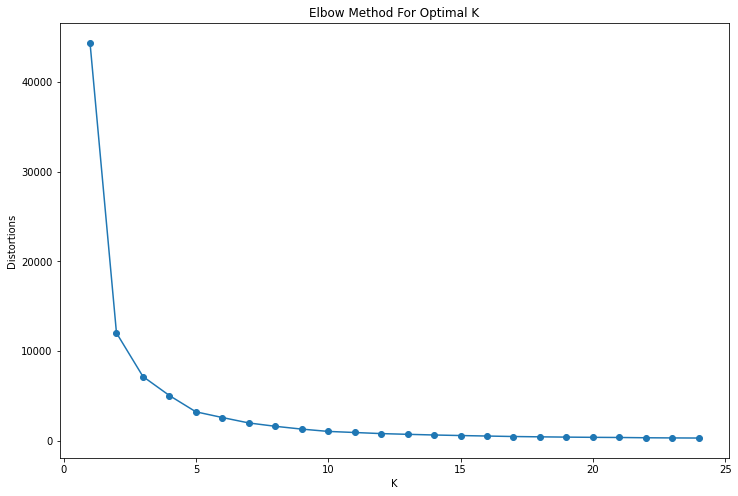

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal K')
plt.show()

This method helps to find an estimate value for the clusters. The plot has several elbows so 5 is chosen for K.

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)

KMeans(n_clusters=5)

In [ ]:
# Get clusters for places
NY_restaurants['cluster'] = kmeans.predict(NY_restaurants[['long','lat']])
NY_restaurants.head()

,placeID,No. of reviews,category1,rating,lat,long,category_highlevel,cluster
0,100000688767224506390,1,Pizza Restaurant,4.000000,40.779188,-73.260358,Restaurant,0
1,100005257123521037535,2,American Restaurant,3.500000,41.626022,-74.597602,Restaurant,0
2,100007969305912588187,9,Austrian Restaurant,4.666667,40.717705,-73.990577,Restaurant,0
3,100010952470282487129,2,Chinese Restaurant,4.000000,40.795737,-73.970681,Restaurant,0
4,100011163464562746921,1,Delivery Restaurant,4.000000,41.328646,-74.191456,Restaurant,0


In [ ]:
# Cluster visualization

# Preparing dataframes for each cluster for folium
cluster0=NY_restaurants.iloc[:, :][NY_restaurants['cluster'] == 0].reset_index()
del cluster0['index']
cluster1=NY_restaurants.iloc[:, :][NY_restaurants['cluster'] == 1].reset_index()
del cluster1['index']
cluster2=NY_restaurants.iloc[:, :][NY_restaurants['cluster'] == 2].reset_index()
del cluster2['index']
cluster3=NY_restaurants.iloc[:, :][NY_restaurants['cluster'] == 3].reset_index()
del cluster3['index']
cluster4=NY_restaurants.iloc[:, :][NY_restaurants['cluster'] == 4].reset_index()
del cluster4['index']

import folium

#Get New York map
latitude=40.730610
longitude=-73.935242
NYS=folium.Map([latitude, longitude], tiles = "Stamen Toner", zoom_start=6)


for idx, row in cluster0.iterrows():
    folium.CircleMarker(
        location = [row["lat"],row["long"]],
        popup = row["placeID"],
        color="#648FFF",
        radius=0.66,
    ).add_to(NYS)

for idx, row in cluster1.iterrows():
    folium.CircleMarker(
        location = [row["lat"],row["long"]],
        popup = row["placeID"],
        color="#785EF0",
        radius=0.66,
    ).add_to(NYS)

for idx, row in cluster2.iterrows():
    folium.CircleMarker(
        location = [row["lat"],row["long"]],
        popup = row["placeID"],
        color="#DC267F",
        radius=0.66,
    ).add_to(NYS)

for idx, row in cluster3.iterrows():
    folium.CircleMarker(
        location = [row["lat"],row["long"]],
        popup = row["placeID"],
        color="#FE6100",
        radius=0.66,
    ).add_to(NYS)
    
for idx, row in cluster4.iterrows():
    folium.CircleMarker(
        location = [row["lat"],row["long"]],
        popup = row["placeID"],
        color="#FFB000",
        radius=0.66,
    ).add_to(NYS)

NYS

Output hidden; open in https://colab.research.google.com to view.

**Findings**

The plot above shows the distribution of clusters in NY state. The size of the marker depends on the number of reviews for each places. Since there are several restaurants with the same rating, therefore the 'No. of reviews' is also used for sorting the top restaurants. Furthermore, this data also implies the places' popularity.

Since  there are several restaurants with the same rating, therefore the 'No. of reviews' is also used for sorting the top restaurants. Furthermore, this data also implies the places' popularity.

In [ ]:
# Get top restaurants in NY based on rating and the number of reviews
NY_restaurants_top = NY_restaurants.sort_values(by=['rating', 'No. of reviews'], ascending=False)

In [ ]:
#Get New York map
latitude=40.730610
longitude=-73.935242
NY=folium.Map([latitude, longitude], tiles = "Stamen Toner", zoom_start=9)

In [ ]:
# Function for location-based recommendations

def NY_recom_restaurants(dataset, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print('Cluster:', cluster)
    
    results=dataset[dataset['cluster']==cluster].iloc[0:5][['placeID', 'lat','long']]
    print(results)
    
    #Add most rated places to the map
    for idx, row in results.iterrows():
        folium.Marker(
            location = [row["lat"],row["long"]],
            popup = row["placeID"],
            #icon = folium.Icon(color = colors[row['cluster']], icon = "info-sign"),
        ).add_to(NY)
   
    # Get the best restaurant in this cluster
    return NY

An example of the recommendations based on the location:

In [ ]:
NY_recom_restaurants(NY_restaurants_top, 40, -70)

Cluster: 0
                     placeID        lat       long
6561   108781260344732185824  40.685607 -73.985878
13080  117628273123261527621  40.724945 -73.992654
4114   105533439767374719265  40.730632 -74.006590
10285  113891103717933018846  40.734999 -73.993005
10942  114813623451138540062  40.762680 -73.975790


**Findings**

As shown above, the function gives the 5 best and most rated restaurant within the user's area. The pop-up is the placeID. Since K-Means clustering is used this means the 5 top restaurant within the cluster. This method does not consider the actual distance between the user and restaurants which can be quite far within the state. Furthermore, this method is non-personalized, so it does not consider the users' taste.

<a id='business'></a>
## 4 Recommendations for businesses based on the user profile

The main idea behind this section is, that it would be beneficial for place owners & managers to know that what kind of reviews they get. But only a dataset can be very overwhelming, therefore, some additional explainer plots could be useful.

In [ ]:
# Drop columns
info=df.drop(columns=['username', 'rating',
       'review', 'lang', 'category', 'date', 'time',
       'name', 'lat', 'long', 'address', 'price_clean',
       'country', 'state'])

In [ ]:
def info_for_places(place):
    
    # Filter for the place
    oneplace=info[info['placeID']==place]
    
    # Merge with user profiles
    infos=oneplace.merge(df_user, on='userID')
    infos=infos.fillna(value='Unknown')
    
    # Get histograms
    n_bins_price=5
    fig, ax = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(18,10))
    ax[0].hist(infos['mean_price'], bins=n_bins_price)
    ax[0].set_title("Mean price of revierers")
    ax[0].set_xlabel("Mean price")
    ax[0].set_ylabel("Counts")
    ax[1].hist(infos['max_price'], bins=n_bins_price)
    ax[1].set_title("Max price of revierers")
    ax[1].set_xlabel("Max price")
    ax[1].set_ylabel("Counts")
    
    # Get pie charts
    fig, (ax1,ax2,ax3, ax4) = plt.subplots(1,4,figsize=(25,10))

    ax1.pie(infos.top_category_highlevel.value_counts(), labels=infos['top_category_highlevel'].unique(), autopct = '%1.1f%%')
    ax1.set_title('Top category highlevel distribution')
    ax2.pie(infos.top_category.value_counts(), labels=infos['top_category'].unique(), autopct = '%1.1f%%')
    ax2.set_title('Top category distribution')
    ax3.pie(infos.gender.value_counts(), labels=infos['gender'].unique(), autopct = '%1.1f%%')
    ax3.set_title('Gender distribution')
    ax4.pie(infos.rating.value_counts(), labels=infos['rating'].unique(), autopct = '%1.1f%%')
    ax4.set_title('Rating distribution')

    return infos.head()

,placeID,userID,currentPlace,education,jobs,previousPlaces,category1,count,gender,top_sentiment,...,mean_price,max_price,interest,university_education,top_category,rating,top_category_highlevel,top_cat_emo,top_states,placeIDs
0,106689630448064755324,117478208650138023908,Unknown,Unknown,Unknown,Unknown,Restaurant,418,Unknown,sia positive,...,1.992727,3.0,"['College', 'Bank', 'Nightlife', 'Gift Shop', ...",Unknown,Brunch Restaurant,5,Restaurant,anticipation,"[' NJ', ' NY']","['115073506834908004704', '1097993925343995784..."
1,106689630448064755324,107056166333058621671,"['New York', [[], 407143530, -740059730, 1]]","[[[], [], [], [], [], 6], [['Cambridge', '', [...","[['Google', 'Product Manager', [[], [1, 1, 201...","[['Salisbury, UK', [[], 510673990, -17976260, ...",Restaurant,116,F,sia positive,...,1.943182,3.0,"['Brazilian Restaurant', 'German Restaurant', ...",0,Art Gallery,5,Other,anticipation,"[' CA', ' CT', ' MA', ' NJ', ' NY', ' OH', ' O...","['102964500548816530716', '1078582183884695354..."
2,106689630448064755324,106513691131743496851,"['New York, NY', [[], 407143530, -740059730, 1]]","[[[], [], [], [], [], 6], [['University of Cal...","[['Google', 'Software Engineer', [[1, 1, 2007]...","[['New Delhi, India', [[], 286353080, 77224960...",Restaurant,31,M,sia positive,...,2.032258,3.0,"['Indian Restaurant', 'Vegetarian Restaurant',...",1,Clothing Store,5,Other,fear,"[' CA', ' NY']","['102274003331123520566', '1073904957218506990..."
3,106689630448064755324,105170348748296700345,[],"[[[], [], [], [], [], 6], []]",[],[],Restaurant,20,M,sia positive,...,1.823529,3.0,"['Bar', 'Mexican Restaurant', 'Sushi Restauran...",0,Chicken Restaurant,5,Restaurant,fear,"[' NJ', ' NV', ' NY', ' TN']","['113513191164990119521', '1162566945155253254..."
4,106689630448064755324,117796314098197661138,Unknown,Unknown,Unknown,Unknown,Restaurant,28,F,sia positive,...,1.631579,3.0,"['American Restaurant', 'Restaurant', 'Spanish...",Unknown,Seafood Restaurant,5,Restaurant,joy,"[' FL', ' GA', ' NY']","['116809454601557723408', '1079701581208387112..."


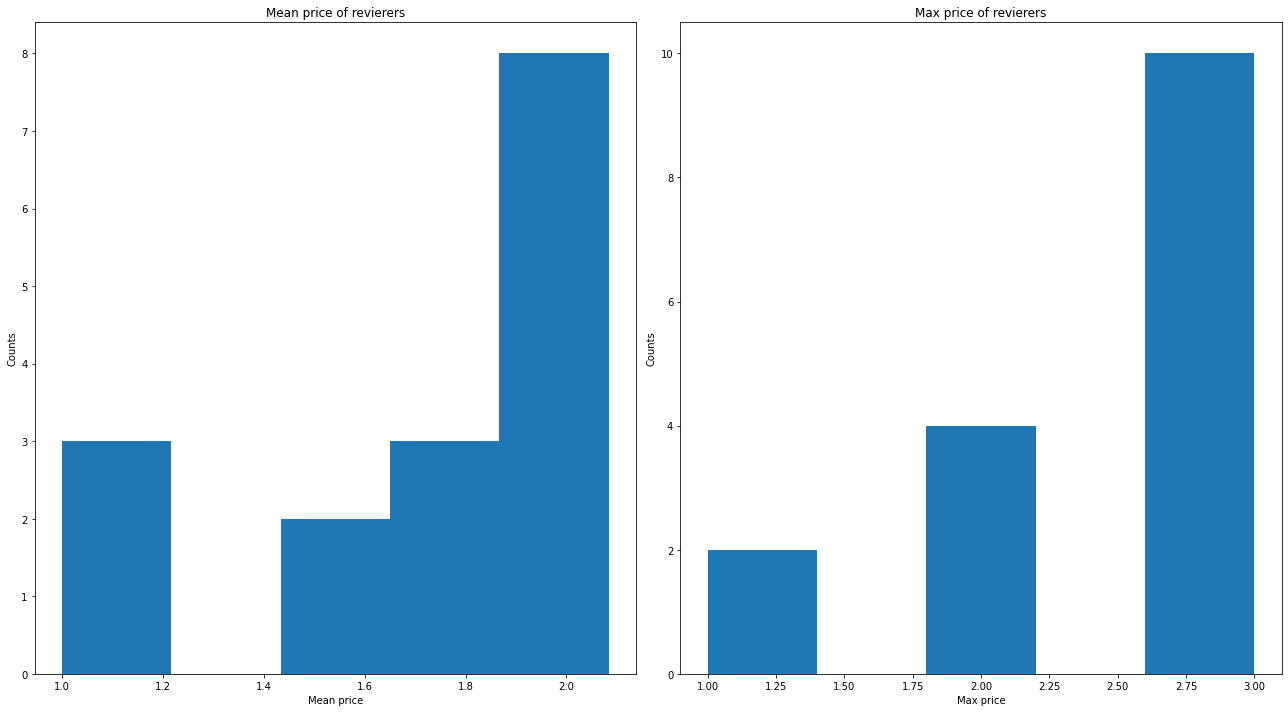

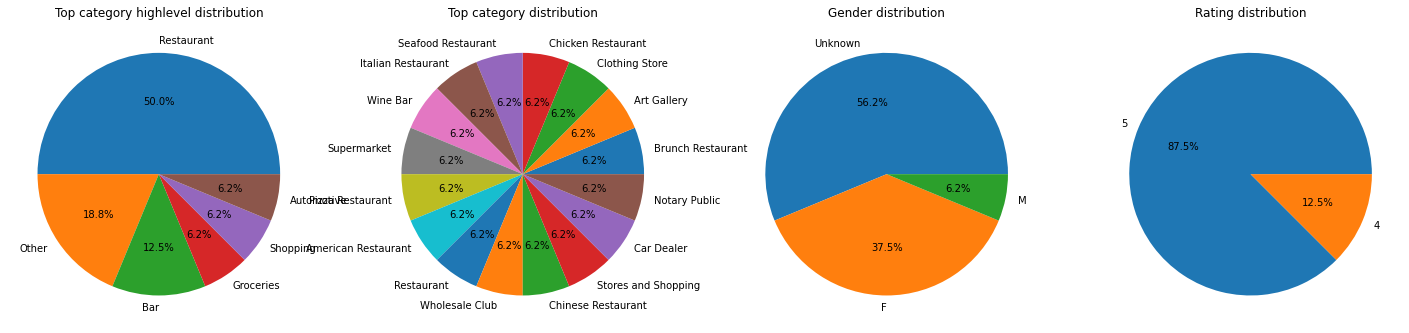

In [ ]:
info_for_places('106689630448064755324')

**Findings** 

The function above gives several information for the owners & managers for the restaurants. Firstly, it gives back all the users who gave reviews, thus, have visited the restaurant. Secondly, the histrograms show the mean and the max price range that people who went there spend. This is valuable in a situation, when a place in unsure wether they should increase prices or not. The top category and top category highlevel distribution show the interests of customers in case the place wants to expand or change the profile. Furthermore, the gender and the rating distribution are shown too, for additional value.<br>
All these information are very useful, although the results are less reliable for places with fewer reviews, so it could be improved by adding more reviews from other platforms as well.

<a id='conclusion'></a>
## 5 Conclusion

Building a recommendation system is not an easy task. 

Even though we presented different possibilities how to make more tailored recommendations than just recommending places based on their mean or weighted rating, every method has its limitations. The different recommendations show potential of creating business value for Google or local businesses however would need to be refined and tested more to really improve user satisfaction or add marketing value.

Additionally, we have only based them on the historical data of the reviews and did not consider additional online activities. This is also an option for improving the recommendations by using further current data of e.g. what kind of posts a person clicks on etc.